In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(vocab_size) = 10000 # Only consider top 10,000 words
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=vocab_size)

print(f"Training entries: {len(train_data)}, labels: {len(train_labels)}")
print(train_data[0])  # Example encoded review

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 3

In [3]:
# 3. Preprocessing: Pad sequences to same length
maxlen = 256  # maximum review length

train_data = keras.preprocessing.sequence.pad_sequences(train_data,value=0,padding='post',maxlen=maxlen)

test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=0,padding='post',maxlen=maxlen)
                                                       
print(f"Padded training data shape: {train_data.shape}")

Padded training data shape: (25000, 256)


In [5]:
# 4. Build the Deep Neural Network Model
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=16),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer: sigmoid for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 5. Train the model
history = model.fit(
    train_data,
    train_labels,
    epochs=15,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5257 - loss: 0.6918 - val_accuracy: 0.6432 - val_loss: 0.6846
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6570 - loss: 0.6799 - val_accuracy: 0.6738 - val_loss: 0.6578
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7269 - loss: 0.6472 - val_accuracy: 0.7674 - val_loss: 0.6066
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7602 - loss: 0.5893 - val_accuracy: 0.8022 - val_loss: 0.5431
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8201 - loss: 0.5225 - val_accuracy: 0.8272 - val_loss: 0.4810
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8399 - loss: 0.4582 - val_accuracy: 0.8420 - val_loss: 0.4296
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8555 - loss: 0.4049 - val_accuracy: 0.8418 - val_loss: 0.3955
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8612 - loss: 0.3663 - val_accuracy: 0.8458 - v

In [7]:
# 6. Evaluate the model on test dataset
results = model.evaluate(test_data, test_labels, verbose=2)

print(f"\nTest Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")

# 7. Plot training and validation accuracy and loss
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))


782/782 - 1s - 1ms/step - accuracy: 0.8760 - loss: 0.3003

Test Loss: 0.3003
Test Accuracy: 0.8760


<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

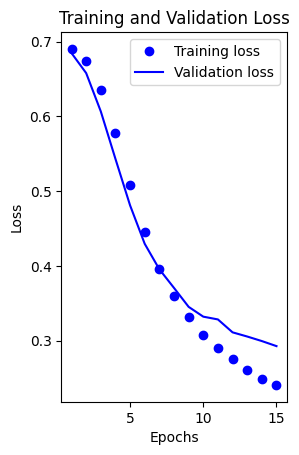

In [8]:
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')  # 'bo' means blue dot
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # 'b' means solid blue line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

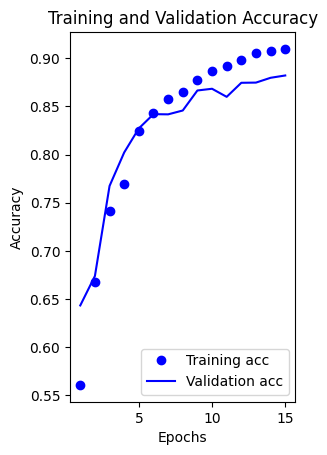

In [9]:
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
# 8. Making Predictions (Optional)
predictions = model.predict(test_data)

print("\nExample Predictions:")
for i in range(10):
    print(f"Review #{i+1} prediction: {'Positive' if predictions[i] > 0.5 else 'Negative'} (Confidence: {predictions[i][0]:.4f})")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Example Predictions:
Review #1 prediction: Negative (Confidence: 0.2044)
Review #2 prediction: Positive (Confidence: 0.9994)
Review #3 prediction: Positive (Confidence: 0.6545)
Review #4 prediction: Negative (Confidence: 0.4502)
Review #5 prediction: Positive (Confidence: 0.9465)
Review #6 prediction: Positive (Confidence: 0.5671)
Review #7 prediction: Positive (Confidence: 0.8547)
Review #8 prediction: Negative (Confidence: 0.0781)
Review #9 prediction: Positive (Confidence: 0.9035)
Review #10 prediction: Positive (Confidence: 0.9865)
